In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## plotly package - iplot
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode (connected= True)



In [22]:
covid19 = pd.read_csv('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid_19_globaldata/covid_19_world.csv')


In [23]:
covid19 ['ObservationDate'] = pd.to_datetime(covid19['ObservationDate'])


In [12]:
print(covid19.head())
print(covid19.tail())


   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      2020-01-22          Anhui  Mainland China  1/22/2020 17:00   
1    2      2020-01-22        Beijing  Mainland China  1/22/2020 17:00   
2    3      2020-01-22      Chongqing  Mainland China  1/22/2020 17:00   
3    4      2020-01-22         Fujian  Mainland China  1/22/2020 17:00   
4    5      2020-01-22          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
         SNo ObservationDate      Province/State  Country/Region  \
35197  35198      2020-06-04           Zacatecas          Mexico   
35198  35199      2020-06-04  Zakarpattia Oblast         Ukraine   
35199  35200      2020-06-04   Zaporizhia Oblast         Ukraine   
35200  35201      2020-06-04            Zhejiang  Mainland China   
35201  3520

In [24]:
covid19_datewise = covid19.groupby('ObservationDate').agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})


In [25]:
covid19_datewise


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-05-31,6166946.0,372035.0,2641329.0
2020-06-01,6265852.0,375543.0,2696009.0
2020-06-02,6378238.0,380250.0,2729527.0


In [26]:
covid19_datewise['Active'] = covid19_datewise['Confirmed'] - covid19_datewise['Recovered'] - covid19_datewise['Deaths']


In [27]:
covid19_datewise

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,510.0
2020-01-23,653.0,18.0,30.0,605.0
2020-01-24,941.0,26.0,36.0,879.0
2020-01-25,1438.0,42.0,39.0,1357.0
2020-01-26,2118.0,56.0,52.0,2010.0
...,...,...,...,...
2020-05-31,6166946.0,372035.0,2641329.0,3153582.0
2020-06-01,6265852.0,375543.0,2696009.0,3194300.0
2020-06-02,6378238.0,380250.0,2729527.0,3268461.0


In [28]:
covid19_datewise['Active'] = covid19_datewise['Confirmed'] - covid19_datewise['Recovered'] - covid19_datewise['Deaths']


In [29]:
## Visualizing the Cases Trends
covid19_datewise.iplot()


In [30]:
## Bar Graph using plotly for Confirmed Cases
import plotly.express as px
fig = px.bar(covid19_datewise, x = covid19_datewise.index, y = 'Confirmed', height = 600, width = 1000, color='Confirmed')
fig.show()


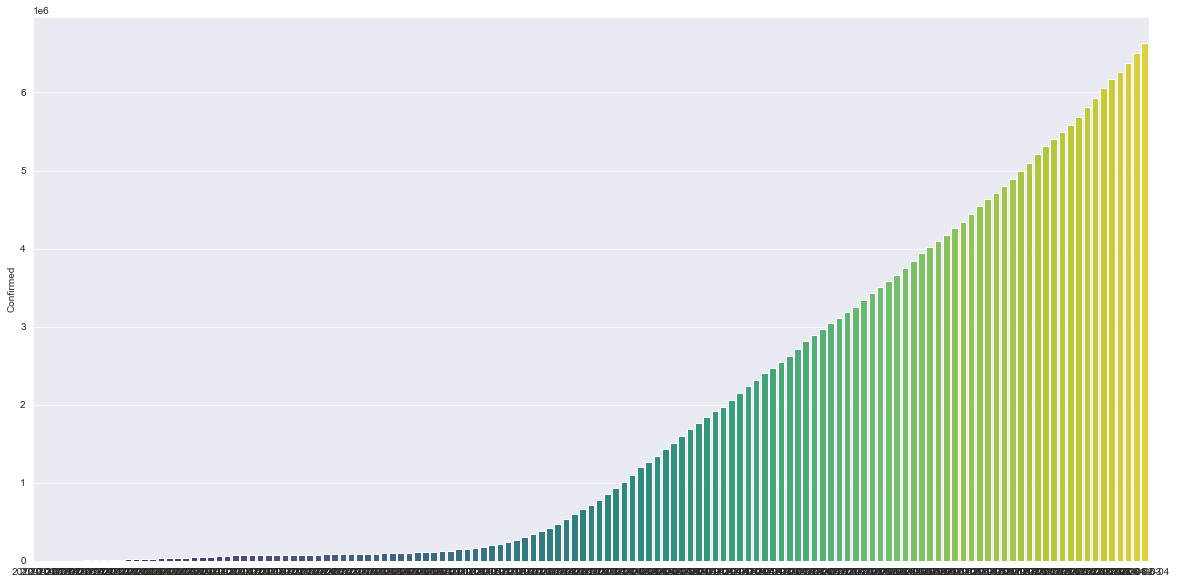

In [20]:
## Bar Graph using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.barplot(x = covid19_datewise.index.date, y = covid19_datewise['Confirmed'], palette='viridis')
plt.show()


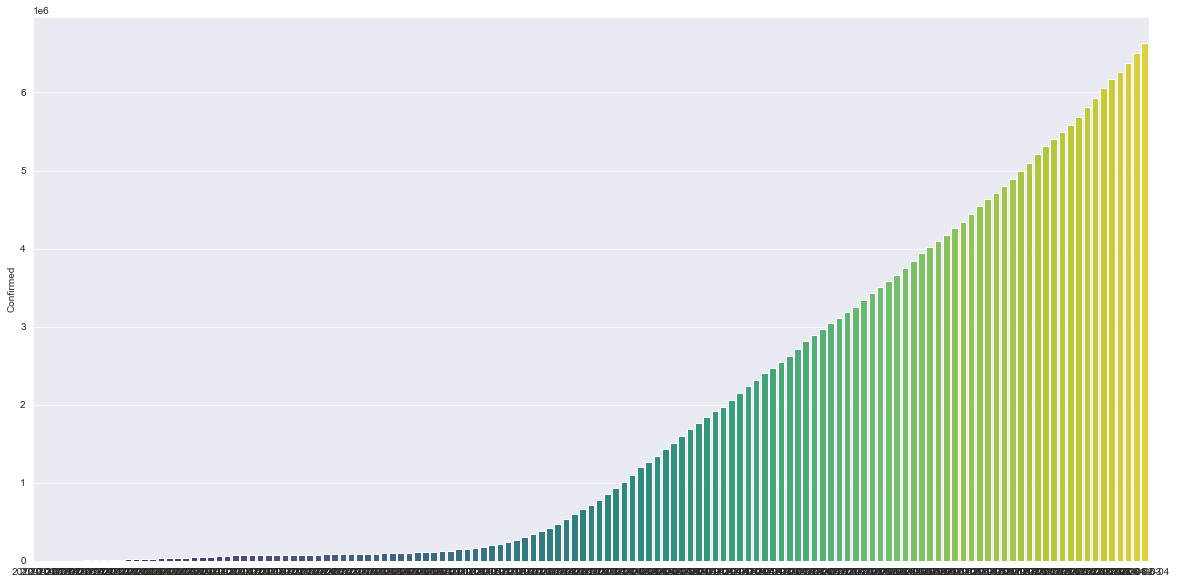

In [31]:
## Bar Graph using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.barplot(x = covid19_datewise.index.date, y = covid19_datewise['Confirmed'], palette='viridis')
plt.show()


In [32]:
covid19_datewise['Mortality Rate'] = (covid19_datewise['Deaths'] / covid19_datewise['Confirmed'])*100


In [33]:
covid19_datewise[['Mortality Rate']].iplot()


In [35]:
from statsmodels.tsa.arima_model import ARIMA
0

0

In [36]:
train_arima = covid19_datewise.iloc[:int(covid19_datewise.shape[0]*.90)]


In [37]:
train_arima = covid19_datewise.iloc[:int(covid19_datewise.shape[0]*.90)]


In [38]:
train_arima


,Confirmed,Deaths,Recovered,Active,Mortality Rate
ObservationDate,,,,,
2020-01-22,555.0,17.0,28.0,510.0,3.063063
2020-01-23,653.0,18.0,30.0,605.0,2.756508
2020-01-24,941.0,26.0,36.0,879.0,2.763018
2020-01-25,1438.0,42.0,39.0,1357.0,2.920723
2020-01-26,2118.0,56.0,52.0,2010.0,2.644004
...,...,...,...,...,...
2020-05-17,4713620.0,315185.0,1733963.0,2664472.0,6.686687
2020-05-18,4801943.0,318481.0,1786875.0,2696587.0,6.632336
2020-05-19,4897492.0,323285.0,1838995.0,2735212.0,6.601032


In [39]:
valid_arima = covid19_datewise.iloc [int(covid19_datewise.shape[0]*.90):]


In [40]:
log_series = np.log(train_arima['Confirmed'])


In [41]:
model_arima = ARIMA(log_series, order=(6,1,4))
Arima_Fit_Model = model_arima.fit()


C:\Users\NEETIKA TIWARI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\NEETIKA TIWARI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [42]:
y_pred = valid_arima.copy()
predictions_ma = Arima_Fit_Model.forecast(len(valid_arima))[0]
y_pred['ARIMA Model Prediction'] = list(np.exp(predictions_ma))


In [43]:
y_pred


,Confirmed,Deaths,Recovered,Active,Mortality Rate,ARIMA Model Prediction
ObservationDate,,,,,,
2020-05-22,5210817.0,338160.0,2056643.0,2816014.0,6.489577,5.244282e+06
2020-05-23,5310362.0,342097.0,2112185.0,2856080.0,6.442066,5.384779e+06
2020-05-24,5407613.0,345059.0,2168563.0,2893991.0,6.380985,5.546947e+06
2020-05-25,5495061.0,346232.0,2231738.0,2917091.0,6.300785,5.774395e+06
2020-05-26,5589626.0,350453.0,2286956.0,2952217.0,6.269704,6.005981e+06
2020-05-27,5691790.0,355629.0,2350088.0,2986073.0,6.248105,6.251440e+06
2020-05-28,5808946.0,360308.0,2415960.0,3032678.0,6.202640,6.543105e+06
2020-05-29,5924275.0,364867.0,2493535.0,3065873.0,6.158846,6.852790e+06
2020-05-30,6059017.0,369126.0,2564693.0,3125198.0,6.092176,7.224483e+06


C:\Users\NEETIKA TIWARI\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



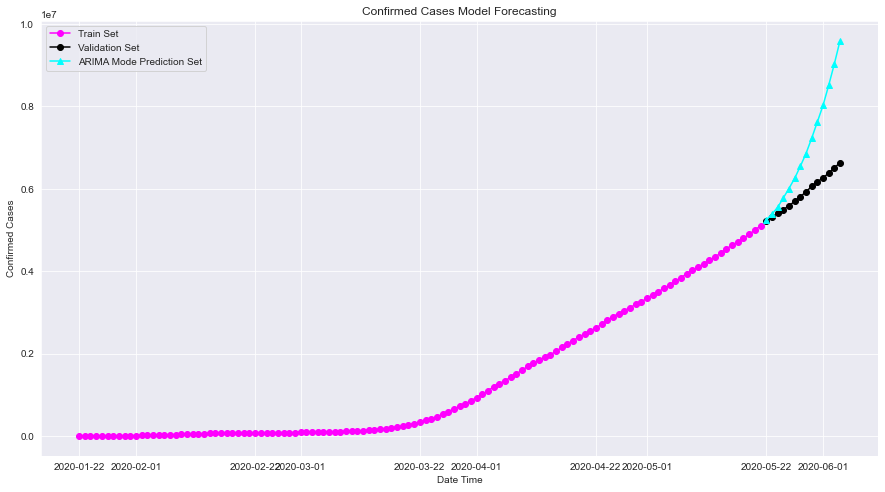

In [44]:
plt.figure(figsize=(15,8))
plt.plot(train_arima.index,train_arima["Confirmed"],label="Train Set", marker='o', color = 'magenta')
plt.plot(valid_arima.index,valid_arima["Confirmed"], label="Validation Set", marker='o', color = 'k')
plt.plot(y_pred["ARIMA Model Prediction"], label="ARIMA Mode Prediction Set", marker='^', color = 'cyan')
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Model Forecasting")
plt.show()


# FBPROFHET -ARIMA WITH CHANGE

In [45]:
from fbprophet import Prophet


In [47]:
prophet_model = Prophet(interval_width= 0.95, weekly_seasonality=True, daily_seasonality=True)


In [48]:
# Input Data Prepration for FbProphet  must be 'ds' & 'y'
prophet_confirmed = pd.DataFrame(zip(list(covid19_datewise.index), list(covid19_datewise.Confirmed)), columns=['ds', 'y'])


In [49]:
prophet_confirmed


,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0
...,...,...
130,2020-05-31,6166946.0
131,2020-06-01,6265852.0
132,2020-06-02,6378238.0
133,2020-06-03,6508635.0


In [50]:
prophet_model.fit(prophet_confirmed)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [51]:
## Generate 10 More date for New Forecasting 
forecast_c = prophet_model.make_future_dataframe(periods=10)


In [52]:
forecast_c


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
140,2020-06-10
141,2020-06-11
142,2020-06-12
143,2020-06-13


In [53]:
confirmed_forecast = prophet_model.predict(forecast_c)


In [54]:
confirmed_forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.338539e+03,-5.228362e+04,3.214714e+04,-1.338539e+03,-1.338539e+03,-11011.642312,-11011.642312,-11011.642312,-8244.530601,-8244.530601,-8244.530601,-2767.111711,-2767.111711,-2767.111711,0.0,0.0,0.0,-1.235018e+04
1,2020-01-23,1.524884e+03,-4.746987e+04,3.452781e+04,1.524884e+03,1.524884e+03,-6401.657652,-6401.657652,-6401.657652,-8244.530601,-8244.530601,-8244.530601,1842.872948,1842.872948,1842.872948,0.0,0.0,0.0,-4.876773e+03
2,2020-01-24,4.388307e+03,-4.331213e+04,4.045536e+04,4.388307e+03,4.388307e+03,-6143.159577,-6143.159577,-6143.159577,-8244.530601,-8244.530601,-8244.530601,2101.371023,2101.371023,2101.371023,0.0,0.0,0.0,-1.754852e+03
3,2020-01-25,7.251730e+03,-3.866227e+04,4.774866e+04,7.251730e+03,7.251730e+03,-3696.559346,-3696.559346,-3696.559346,-8244.530601,-8244.530601,-8244.530601,4547.971255,4547.971255,4547.971255,0.0,0.0,0.0,3.555171e+03
4,2020-01-26,1.011515e+04,-3.659333e+04,4.669644e+04,1.011515e+04,1.011515e+04,-6132.606112,-6132.606112,-6132.606112,-8244.530601,-8244.530601,-8244.530601,2111.924489,2111.924489,2111.924489,0.0,0.0,0.0,3.982547e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020-06-10,7.122885e+06,7.051500e+06,7.173469e+06,7.073292e+06,7.167354e+06,-11011.642312,-11011.642312,-11011.642312,-8244.530601,-8244.530601,-8244.530601,-2767.111711,-2767.111711,-2767.111711,0.0,0.0,0.0,7.111873e+06
141,2020-06-11,7.221118e+06,7.143193e+06,7.281299e+06,7.153829e+06,7.281202e+06,-6401.657652,-6401.657652,-6401.657652,-8244.530601,-8244.530601,-8244.530601,1842.872948,1842.872948,1842.872948,0.0,0.0,0.0,7.214717e+06
142,2020-06-12,7.319352e+06,7.226778e+06,7.396439e+06,7.238373e+06,7.391769e+06,-6143.159577,-6143.159577,-6143.159577,-8244.530601,-8244.530601,-8244.530601,2101.371023,2101.371023,2101.371023,0.0,0.0,0.0,7.313209e+06
143,2020-06-13,7.417586e+06,7.318211e+06,7.507015e+06,7.325831e+06,7.505554e+06,-3696.559346,-3696.559346,-3696.559346,-8244.530601,-8244.530601,-8244.530601,4547.971255,4547.971255,4547.971255,0.0,0.0,0.0,7.413889e+06


Figure(720x432)


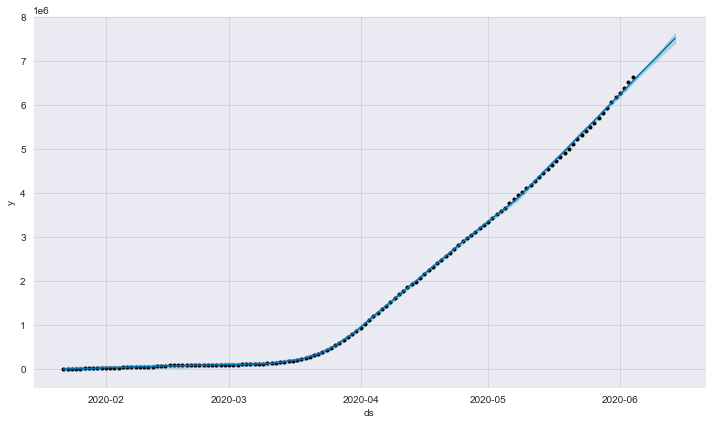

In [56]:
print(prophet_model.plot(confirmed_forecast))


In [58]:
confirmed_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
## Root Mean Squared Error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(covid19_datewise ["Confirmed"],confirmed_forecast['yhat'].head(covid19_datewise.shape[0])))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(covid19_datewise["Confirmed"],confirmed_forecast['yhat'].head(covid19_datewise.shape[0]))))


Root Mean Squared Error for Prophet Model:  22271.49449094623
